In [2]:
import augmentation, dataset, torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Ignore Warning
warnings.filterwarnings(action='ignore')

In [3]:
train_image_dir = '/Users/GabrielFournier/Downloads/CyclisteFrames/TrainData/'
train_ann = '/Users/GabrielFournier/Downloads/CyclisteFrames/CyclistTrainJson.json'

dataset = dataset.COCO_detection(train_image_dir, train_ann)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [4]:
# index 42 have no bbox
ex1, ex2, ex3, ex4 = dataset[2], dataset[25], dataset[28], dataset[42]
#int(ex1[2][0])
print(dataset[25])

(<PIL.Image.Image image mode=RGB size=1920x1440 at 0x7FFA8AFE4E20>, None, None)


In [242]:
aug_list = [[augmentation.AutoContrast(1), augmentation.Equalize(1)], 
            [augmentation.Posterize(1, 6), augmentation.Posterize(1, 3)],
            [augmentation.Solarize(1, 230), augmentation.Solarize(1, 200)],
            [augmentation.SolarizeAdd(1, 50, minus=False), augmentation.SolarizeAdd(1, 100, minus=False)],
            [augmentation.Color(1, -0.5, minus=False), augmentation.Color(1, 0.5, minus=False)], 
            [augmentation.Contrast(1, -0.5, minus=False), augmentation.Contrast(1, 0.5, minus=False)], 
            [augmentation.Brightness(1, -0.5, minus=False), augmentation.Brightness(1, 0.5, minus=False)], 
            [augmentation.Sharpness(1, -0.5, minus=False), augmentation.Sharpness(1, 0.5, minus=False)]]

title_list = [['AutoContrast', 'Equalize'],
              ['Posterize 6', 'Posterize 3'],
              ['Solarize 230', 'Solarize 200'],
              ['SolarizeAdd 50', 'SolarizeAdd 100'],
              ['Color 0.5', 'Color 1.5'],
              ['Contrast 0.5', 'Contrast 1.5'],
              ['Brightness 0.5', 'Brightness 1.5'],
              ['Sharpness 0.5', 'Sharpness 1.5']]

In [244]:
import os
path2='/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/Color'
#os.mkdir(path2)
for k in range(len(title_list)):
    for j in range(len(title_list[k])):
        os.mkdir(path2+'/'+str(title_list[k][j]))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bolosse
bo

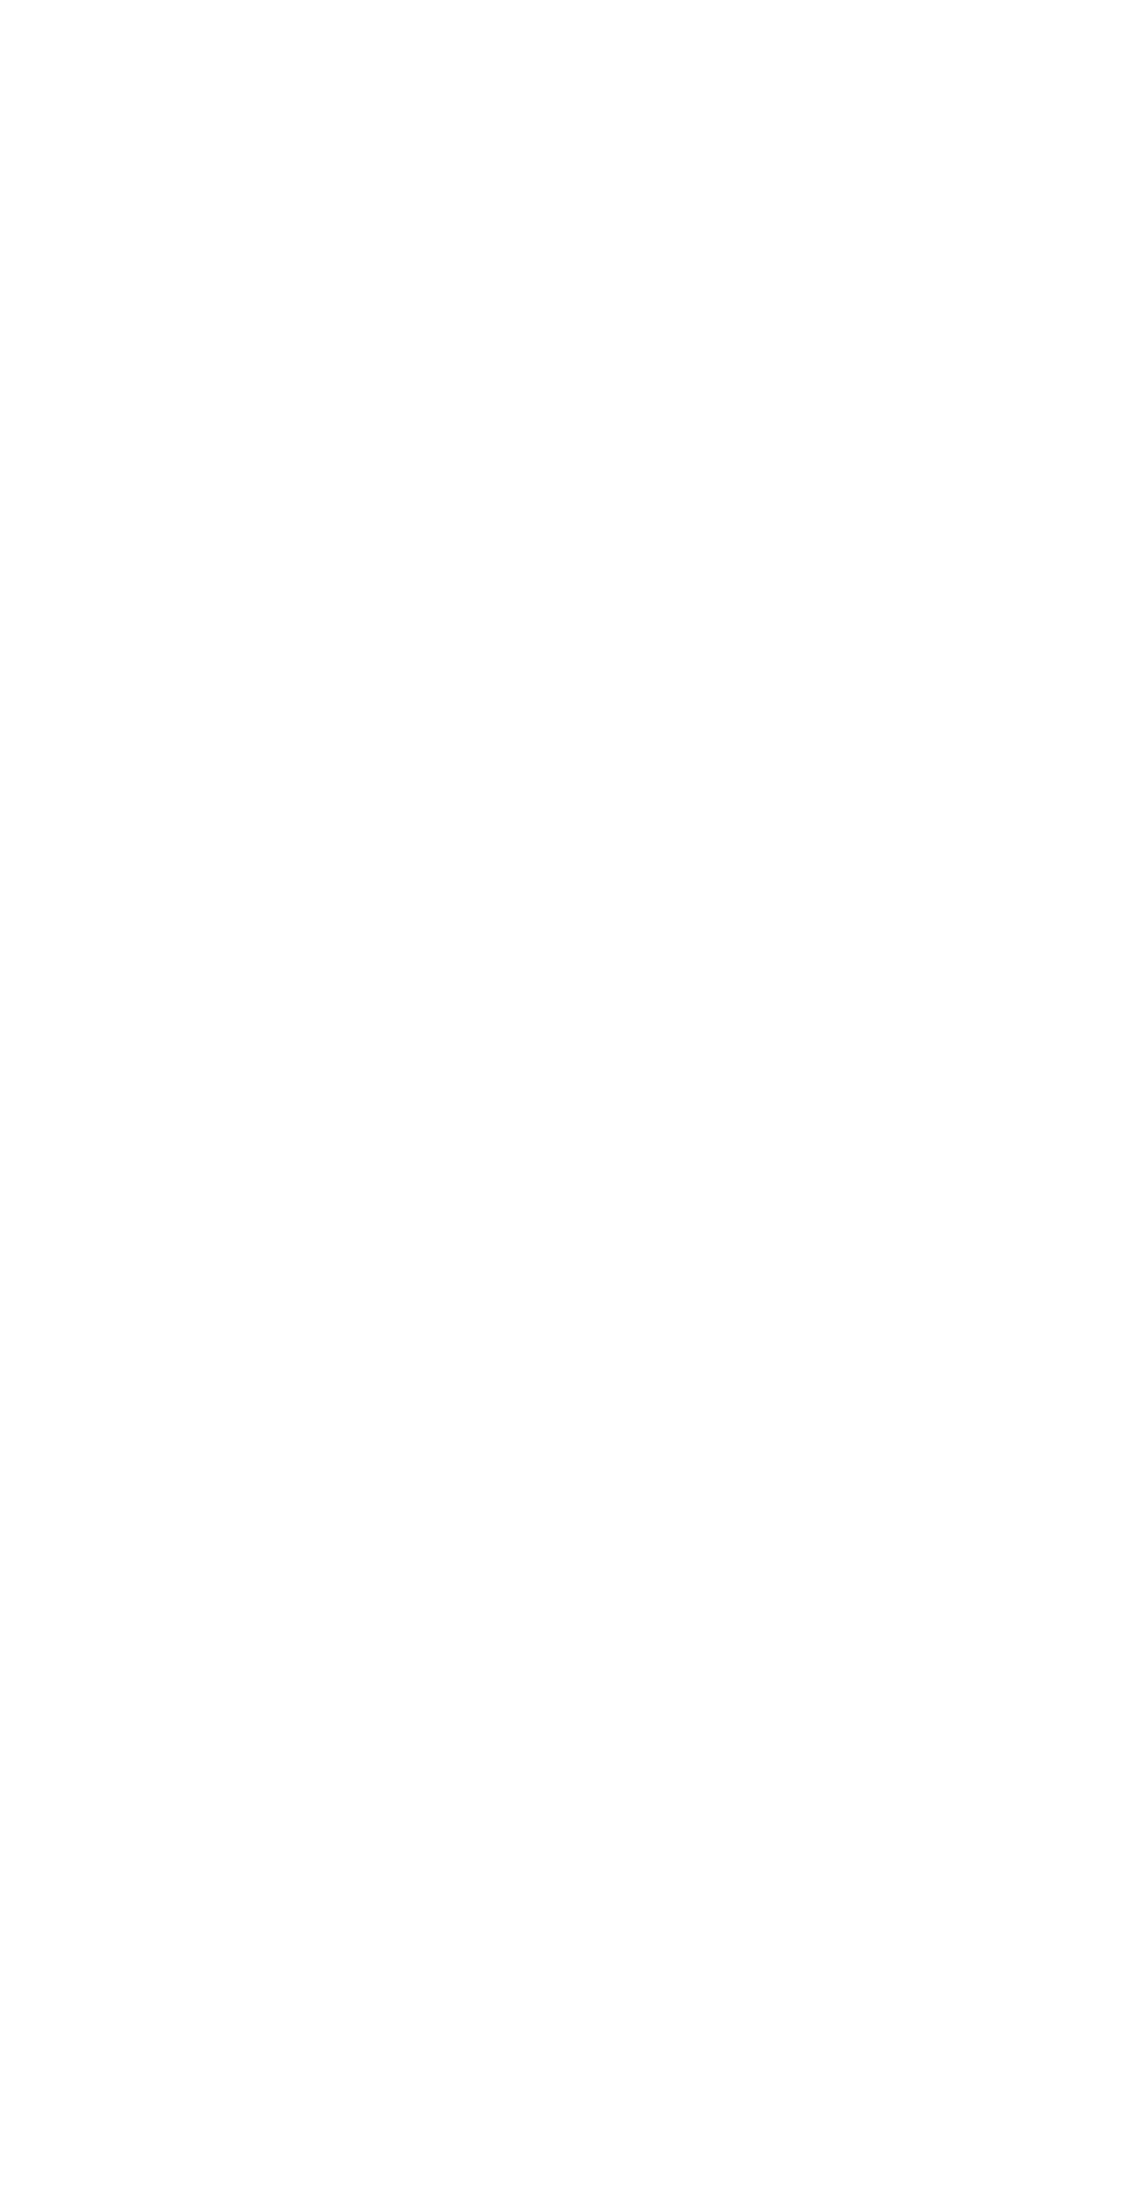

In [245]:
import json
plt.figure(figsize=(20, 40))
plt.rcParams['axes.titlesize'] = 20
plt.axis('off')

path = "/Users/GabrielFournier/Downloads/AllJson/newJson.json"
f = open(path,)
data=json.load(f)


newData={
    "licenses":data["licenses"],
    "info":data["info"],
    "categories": data["categories"],
    "images": [],
    "annotations": [],   
}
listOfAnnotation=[]
annotationId=1
toto=0
sublistOfAnnotation=[]

for k in range(len(title_list)):
    listOfAnnotation.append([newData,newData])
    sublistOfAnnotation.append([[],[]])

                               
                               
#print(sublistOfAnnotation)                               
for k in range(len(dataset)):
    #print("=======")
    print(k)
    #print("=======")
    
    NewImage=data["images"][k]
    
    NewImage["file_name"]=str(k)+".jpg"
    toto=0
    for i in range(len(aug_list)): 
        #print(i)
        #plt.subplot(8, 3, 3*i+1)
        image, bboxs, label = dataset[k]
        Onetype=[]
        for j in range(len(aug_list[i])):
            #print(j)
            aug_image, aug_bboxes = aug_list[i][j](image, bboxs)
            #print(listOfAnnotation[i][j]["images"])
            #print(NewImage)
            aug_image.save(path2+'/'+str(title_list[i][j])+"/"+str(k)+".jpg")
            if(toto==0):
                listOfAnnotation[i][j]["images"].append(NewImage)
                toto+=1
            
            
            if dataset[k][2] == None: 
                print("bolosse")
            else:
                #print(i,j)
                cat=0
                for bbox in aug_bboxes:
                    min_x, min_y, max_x, max_y = bbox
                    
                    newAnnotation={
                            "id":0,
                            "image_id":0,
                            "category_id":0,
                            "segmentation":[],
                            "area":0,
                            "bbox":[],
                            "iscrowd":0,
                        }
                    newAnnotation["bbox"]=[float(min_x), float(min_y),float(max_x-min_x),float(max_y-min_y)]
                    newAnnotation["area"]=float((max_x-min_x)*(max_y-min_y))
                    newAnnotation["id"]=len(sublistOfAnnotation[i][j])+1
                    
                    #print(newAnnotation["id"])
                    newAnnotation["image_id"]=data["images"][k]["id"]
                    newAnnotation["category_id"]=int(dataset[k][2][cat])+1
                    #print("===========",newAnnotation)
                    cat+=1
                    info=listOfAnnotation[0][0]
                    #Onetype.append(newAnnotation)
                    sublistOfAnnotation[i][j].append(newAnnotation)
                    #print(info["annotations"])
                    #print(newAnnotation)
                #if(j==0):
                #    listOfAnnotation[0][0]["annotations"]=listOfAnnotation[0][0]["annotations"]+Onetype
                #Onetype=[]
                #print(i,j)
                #print(listOfAnnotation[1][1]["annotations"])
                #print("==============================")
                    #plt.gca().add_patch(Rectangle((min_x, min_y), max_x-min_x, max_y-min_y, edgecolor='r', facecolor='none'))
                    #print(Rectangle((min_x, min_y), max_x-min_x, max_y-min_y, edgecolor='r', facecolor='none'))


In [246]:
#print(listOfAnnotation[1][0]["images"])
print(len(sublistOfAnnotation[1][0]))
print(sublistOfAnnotation[1][0][3])
#print(len(listOfAnnotation[1][0]["images"]))
#print(len(listOfAnnotation[1][0]["annotations"])/len(listOfAnnotation[1][0]["images"])/10)

1610
{'id': 4, 'image_id': 2, 'category_id': 2, 'segmentation': [], 'area': 385135.21875, 'bbox': [59.540000915527344, 478.239990234375, 446.8599853515625, 861.8699951171875], 'iscrowd': 0}


In [248]:
last=[]
for i in range(len(listOfAnnotation)):
    newJson=[]
    for j in range(len(listOfAnnotation[i])):
        #print(i,j)
        
        #print(listOfAnnotation[i][j]["annotations"][2])
        #print(sublistOfAnnotation[i][j][0])
        listOfAnnotation[i][j]["annotations"]=[]
        
        newJson=listOfAnnotation[i][j]
        
        newJson["annotations"]=sublistOfAnnotation[i][j]

        print(path2+title_list[i][j]+'/')
        with open(path2+'/'+title_list[i][j]+'/'+title_list[i][j]+'.json', 'w') as outfile:
            json.dump(newJson, outfile)
        
#print(listOfAnnotation[0][0]["images"]==listOfAnnotation[1][1]["images"])

/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorAutoContrast/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorEqualize/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorPosterize 6/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorPosterize 3/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorSolarize 230/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorSolarize 200/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorSolarizeAdd 50/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorSolarizeAdd 100/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorColor 0.5/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorColor 1.5/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorContrast 0.5/
/Users/GabrielFournier/Downloads/CyclisteFrames/AugmentedData/ColorContrast 1.5/
/Users/GabrielFournier/Downloads/Cy

In [223]:
for i in range(len(last)):
    print("=====================")
    print(last[i]["annotations"][0])
    
print(last[0]==last[7])

{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 345269.5, 'bbox': [204.17999267578125, 413.13397216796875, 746.9000244140625, 462.27001953125], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 345269.5, 'bbox': [204.17999267578125, 413.13397216796875, 746.9000244140625, 462.27001953125], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 345269.5, 'bbox': [204.17999267578125, 413.13397216796875, 746.9000244140625, 462.27001953125], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 345269.5, 'bbox': [204.17999267578125, 413.13397216796875, 746.9000244140625, 462.27001953125], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 345269.5, 'bbox': [204.17999267578125, 413.13397216796875, 746.9000244140625, 462.27001953125], 'iscrowd': 0}
{'id': 1, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 345269.5, 'bbox': [204.1

In [204]:
print(len(last))
print(last)

10


In [22]:
elt["area"]

647444

In [185]:
print(listOfAnnotation[0][0]["annotations"][1])

{'id': 2, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 445935.0625, 'bbox': [193.22999572753906, 257.4960021972656, 483.84002685546875, 921.6580810546875], 'iscrowd': 0}


In [187]:
print(len(sublistOfAnnotation[0][0]))

1610
